In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv("CarMakers.csv")

In [58]:
df.head()

,Car ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,3.19,3.40,8.0,115,5500,18,22,17450


Steps
1. Data cleaning
2. EDA
3. Pre processing
4. Algorithms
5. website
6. Github

# Data cleaning

In [59]:
df.shape

(195, 23)

In [60]:
df.sample(3)

,Car ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
151,152,toyota,gas,std,four,hatchback,fwd,front,95.7,166.3,...,four,98,3.19,3.03,9.0,70,4800,28,34,8358
160,161,toyota,gas,std,two,hardtop,rwd,front,98.4,176.2,...,four,146,3.62,3.50,9.3,116,4800,24,30,11199
136,137,subaru,gas,std,four,wagon,fwd,front,97.0,173.5,...,four,108,3.62,2.64,9.0,82,4800,28,32,7463


In [61]:
df['make']=df['make'].astype("category")

In [62]:
df.drop(columns=['Car ID','wheel-base','length','width','height','curb-weight','bore','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg'],axis='columns',inplace=True)

In [63]:
df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,num-of-cylinders,engine-size,stroke,price
0,alfa-romero,gas,std,two,convertible,rwd,front,four,130,2.68,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,four,130,2.68,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,six,152,3.47,16500
3,audi,gas,std,four,sedan,fwd,front,four,109,3.40,13950
4,audi,gas,std,four,sedan,4wd,front,five,136,3.40,17450


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   make              195 non-null    category
 1   fuel-type         195 non-null    object  
 2   aspiration        195 non-null    object  
 3   num-of-doors      195 non-null    object  
 4   body-style        195 non-null    object  
 5   drive-wheels      195 non-null    object  
 6   engine-location   195 non-null    object  
 7   num-of-cylinders  195 non-null    object  
 8   engine-size       195 non-null    int64   
 9   stroke            195 non-null    float64 
 10  price             195 non-null    int64   
dtypes: category(1), float64(1), int64(2), object(7)
memory usage: 16.3+ KB


In [65]:
df['make'].value_counts()

toyota           32
nissan           18
honda            13
mazda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

In [66]:
import squarify

In [83]:
size=df['make'].value_counts().values.tolist()
labels=df['make'].value_counts().index.tolist()

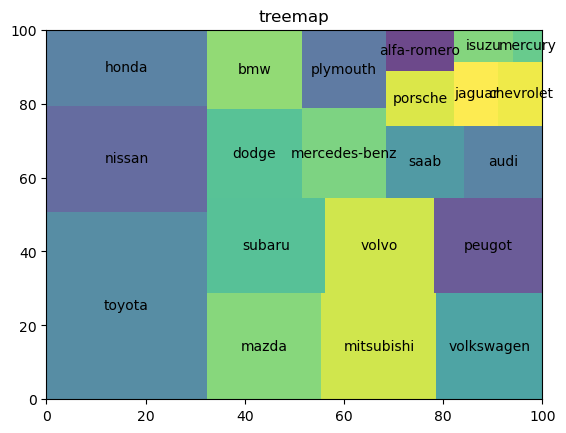

In [84]:
squarify.plot(sizes=size,label=labels,alpha=0.8)
plt.title("treemap")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


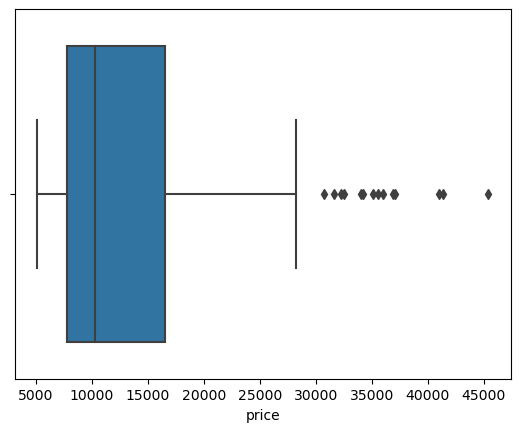

In [69]:
sns.boxplot(df['price']);

In [70]:
percentile25=df['price'].quantile(0.25)
percentile75=df['price'].quantile(0.75)

In [71]:
iqr=percentile75 - percentile25

In [72]:
uper_limit=percentile75 + 1.5*iqr
lower_limit=percentile25 - 1.5*iqr

In [73]:
uper_limit

29637.75

In [74]:
lower_limit

-5372.25

In [75]:
df_new=df[df['price']<uper_limit]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


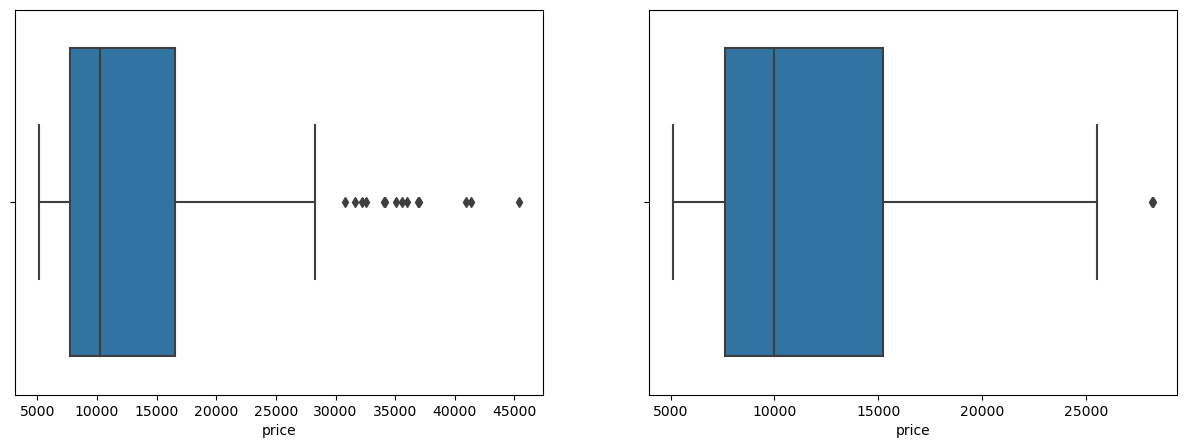

In [76]:
fig,axis=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(df['price'],ax=axis[0])
sns.boxplot(df_new['price'],ax=axis[1])
plt.show()

In [88]:
df_new.sample(2)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,num-of-cylinders,engine-size,stroke,price
143,toyota,gas,std,four,wagon,fwd,front,four,92,3.03,6918
21,dodge,gas,std,two,hatchback,fwd,front,four,90,3.23,6377


# Pre processing

In [89]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [90]:
df.sample(2)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,num-of-cylinders,engine-size,stroke,price
31,honda,gas,std,two,hatchback,fwd,front,four,79,3.07,5399
69,mitsubishi,gas,std,two,hatchback,fwd,front,four,92,3.23,5389


In [91]:
x=df.drop('price',axis='columns')

In [92]:
y=df['price']

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [94]:
trf1=ColumnTransformer([
    ("ohe",OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,2,4,5,6])
],remainder="passthrough")

In [95]:
trf2=ColumnTransformer([
    ("ore",OrdinalEncoder(categories=[["two","four"],["three","four","five","six","eight","twelve"]]),[3,7])
],remainder="passthrough")

In [96]:
trf3=LinearRegression()

In [97]:
pipe=Pipeline([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3)
])

In [98]:
df['make'].value_counts()

toyota           32
nissan           18
honda            13
mazda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

In [99]:
df_make=df['make'].value_counts().values

In [100]:
threshold = 11
make_counts = df['make'].value_counts()
makes_to_keep = make_counts[make_counts >= threshold].index

In [101]:
df['make'] = df['make'].apply(lambda x: x if x in makes_to_keep else 'other')

In [102]:
df['make'].value_counts()

other         60
toyota        32
nissan        18
honda         13
mazda         13
mitsubishi    13
subaru        12
volkswagen    12
peugot        11
volvo         11
Name: make, dtype: int64

In [103]:
make=df['body-style'].value_counts()

In [104]:
keep=make[make>13].index

In [105]:
keep

Index(['sedan', 'hatchback', 'wagon'], dtype='object')

In [106]:
df['body-style']=df['body-style'].apply(lambda x: x if x in keep else "Other")

In [107]:
df['body-style'].value_counts()

sedan        94
hatchback    63
wagon        24
Other        14
Name: body-style, dtype: int64